# Proof of Portfolio/Feature Covariance & Variance

Import Dependencies

In [100]:
import numpy as np
import pandas as pd

Create Sample Features & Weights

In [125]:
# Portfolio Weights
w = pd.Series([.2, .3, .4, .1])

# Asset Returns
x = pd.DataFrame(np.random.rand(252, 4)/10)

In [126]:
# Feature weights
w

0    0.2
1    0.3
2    0.4
3    0.1
dtype: float64

In [146]:
# Feature vectors
x.tail()

,0,1,2,3
247,0.009791,0.032046,0.013448,0.003503
248,0.049839,0.060463,0.019647,0.035053
249,0.045356,0.025284,0.033803,0.026085
250,0.066262,0.038944,0.046579,0.025898
251,0.057889,0.041565,0.045718,0.020956


# Linear & Non-Linear Algebra Formulation of Variance & Covariance 

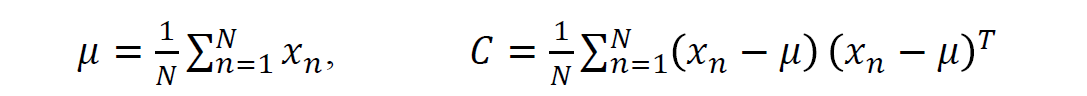

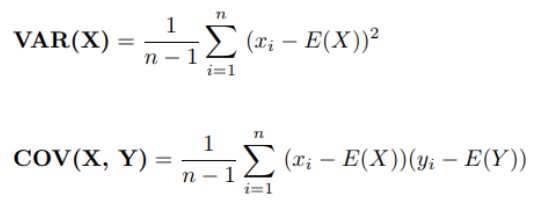

Cov(X1, X2) = (X - X_Mean).T * (X - X_mean) / (N-1) = (Standardized X).T * (Standardized X) / (N-1) --> (N, N) Symmetric Matrix

Example Computation: 

- Var(X1)     = Cov(X1,X1) = SUM((X1 - X1_Mean) * (X1 - X1_Mean)) / (N-1) = (X1 - X1_Mean).T * (X2 - X2_Mean) / (N-1) = SUM((X1 - X1_Mean)**2) / (N-1)
    -         = Sum Product of Demeaned X1 & Demeaned X1 / (N-1)
    -         = Sum Down Rows of (Demeaned X1)^2 / (N-1)
    -         = (Demeaned_X1,1 * Demeaned_X1,1 + Demeaned_X1,2 * Demeaned_X1,2 + ... + Demeaned_X1,N * Demeaned_X1,N) / (N-1)
- Cov(X1, X2) = SUM((X1 - X1_Mean) * (X2 - X2_Mean)) / (N-1) = (X1 - X1_Mean).T * (X2 - X2_Mean) / (N-1)
    -         = Sum Product of Demeaned X1 & Demeaned X2 / (N-1)
    -         = (Demeaned_X1,1 * Demeaned_X2,1 + Demeaned_X1,2 * Demeaned_X2,2 + ... + Demeaned_X1,N * Demeaned_X2,N) / (N-1)


Standardize/Demean X to Compute Covariance Matrix

In [145]:
standardized_X = x - x.mean()

Cov = (standardized_X.T * standardized_X) / (N - 1)

In [129]:
n = len(standardized_X)
covariance_X = standardized_X.T.dot(standardized_X)/(n-1) # OR np.dot(np.transpose(standardized_X), standardized_X) / (n - 1)

Compare Mathematical Formulation of Covariance Matrix with numpy:

In [130]:
# Print Mathematically Formulated Cov
covariance_X

,0,1,2,3
0,0.000828,-0.000058,-0.000031,-0.000015
1,-0.000058,0.000818,0.000119,-0.000061
2,-0.000031,0.000119,0.000930,-0.000014
3,-0.000015,-0.000061,-0.000014,0.000810


In [143]:
# Print numpy's Cov
covariance_X_numpy = np.cov(x.T, bias=0)
pd.DataFrame(covariance_X_numpy)

,0,1,2,3
0,0.000828,-0.000058,-0.000031,-0.000015
1,-0.000058,0.000818,0.000119,-0.000061
2,-0.000031,0.000119,0.000930,-0.000014
3,-0.000015,-0.000061,-0.000014,0.000810


In [147]:
# Systematically Check for Mathematical Equivilance
covariance_accuracy_check = np.allclose(covariance_X, covariance_X_numpy)
assert covariance_accuracy_check
covariance_accuracy_check

True

# Linear Algebra Formulation of Portfolio Variance

Let:
- X = Portfolio Returns
- a = Portfolio Weights

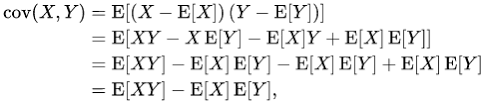

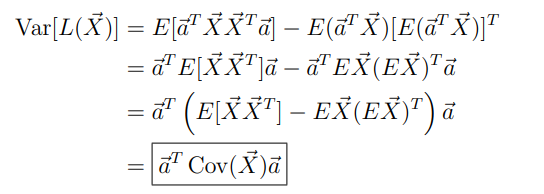

Portfolio Variance = w.T * Σ * w = Portfolio Weights Transposed * Covariance Matrix * Portfolio Weights

In [113]:
variance_X = w.T.dot(covariance_X).dot(w)
variance_X

0.050547803628564564

Portfolio Volatility (Standard Deviation) = √(w.T * Σ * w)

In [114]:
vol_X = np.sqrt(variance_X)
vol_X

0.22482838706125294